In [46]:
import pandas as pd
import numpy as np
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/House Pricing Linear Regression Project/Raw_Housing_Prices.csv")

In [47]:
df.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,Fair,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,Fair,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,None,Fair,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,Excellent,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,Fair,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21613 non-null  int64  
 1   Date House was Sold                        21613 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21613 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21604 non-null  float64
 6   Lot Area (in Sqft)                         21604 non-null  float64
 7   No of Floors                               21613 non-null  float64
 8   Waterfront View                            21613 non-null  object 
 9   No of Times Visited                        21613 non-null  object 
 10  Condition of the House

In [49]:
df.dropna(inplace=True)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21580 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21580 non-null  int64  
 1   Date House was Sold                        21580 non-null  object 
 2   Sale Price                                 21580 non-null  float64
 3   No of Bedrooms                             21580 non-null  int64  
 4   No of Bathrooms                            21580 non-null  float64
 5   Flat Area (in Sqft)                        21580 non-null  float64
 6   Lot Area (in Sqft)                         21580 non-null  float64
 7   No of Floors                               21580 non-null  float64
 8   Waterfront View                            21580 non-null  object 
 9   No of Times Visited                        21580 non-null  object 
 10  Condition of the House

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Sales price Boxplot')

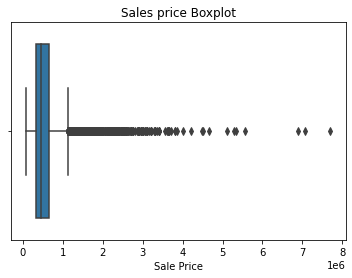

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(df['Sale Price'])
plt.title('Sales price Boxplot')

In [52]:
Q1 = df['Sale Price'].quantile(0.25)
Q3 = df['Sale Price'].quantile(0.75)
IQR = Q3 - Q1
UL = Q3 + 1.5*(IQR) #Upper limit
LL = Q1 - 1.5*(IQR) #Lower limit

In [53]:
def limit_imputation(x):
  if x > UL:
    return UL
  if x < LL:
    return LL
  else:
    return x

In [54]:
df['Sale Price']=df['Sale Price'].apply(limit_imputation)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Sales price Boxplot after outlier treatment')

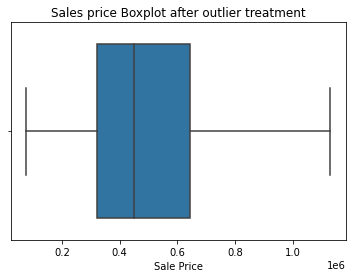

In [55]:
sns.boxplot(df['Sale Price'])
plt.title('Sales price Boxplot after outlier treatment')

In [56]:
df.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,Fair,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,Fair,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,None,Fair,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,Excellent,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,Fair,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


In [57]:
df['No of Times Visited'].unique()

array(['None', 'Thrice', 'Four', 'Twice', 'Once'], dtype=object)

In [58]:
map1 = {'None': 0, 'Thrice': 3, 'Four': 4, 'Twice':2, 'Once':1}
df['No of Times Visited']=df['No of Times Visited'].map(map1)

In [59]:
df['No of Times Visited'].unique()

array([0, 3, 4, 2, 1])

In [60]:
df.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,Fair,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,Fair,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,0,Fair,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,Excellent,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,Fair,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


In [61]:
df['Waterfront View'].unique()

array(['No', 'Yes'], dtype=object)

In [62]:
df['Waterfront View'] = df['Waterfront View'].map({'No':0,'Yes':1})
df['Waterfront View'].unique()

array([0, 1])

In [63]:
df['Condition of the House'].unique()

array(['Fair', 'Excellent', 'Good', 'Bad', 'Okay'], dtype=object)

In [64]:
df['Condition of the House']=df['Condition of the House'].map({'Fair':4, 'Excellent':5, 'Good':3, 'Bad':1, 'Okay':2})
df['Condition of the House'].unique()

array([4, 5, 3, 1, 2])

In [65]:
df.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,0,0,4,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,0,0,4,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,0,0,4,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,0,0,5,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,0,0,4,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


In [66]:
df['Date House was Sold'] = pd.DatetimeIndex(df['Date House was Sold']).year

In [67]:
df.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,2017,221900.0,3,1.00,1180.0,5650.0,1.0,0,0,4,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,2017,538000.0,3,2.25,2570.0,7242.0,2.0,0,0,4,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,2016,180000.0,2,1.00,770.0,10000.0,1.0,0,0,4,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,2017,604000.0,4,3.00,1960.0,5000.0,1.0,0,0,5,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,2016,510000.0,3,2.00,1680.0,8080.0,1.0,0,0,4,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


In [69]:
minimum = df['Date House was Sold'].min()
df['Date House was Sold'] = df['Date House was Sold'] - minimum

In [70]:
df.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,1,221900.0,3,1.00,1180.0,5650.0,1.0,0,0,4,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,1,538000.0,3,2.25,2570.0,7242.0,2.0,0,0,4,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,0,180000.0,2,1.00,770.0,10000.0,1.0,0,0,4,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,1,604000.0,4,3.00,1960.0,5000.0,1.0,0,0,5,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,0,510000.0,3,2.00,1680.0,8080.0,1.0,0,0,4,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


In [74]:
Zip_Table = df.groupby('Zipcode').agg({'Sale Price' : 'mean'}).sort_values('Sale Price',ascending=True)

In [75]:
Zip_Table.head()

,Sale Price
Zipcode,
98002.0,234284.035176
98168.0,240328.371747
98032.0,251296.240000
98001.0,280804.690608
98148.0,284908.596491


In [77]:
Zip_Table['Zipcode_Group'] = pd.cut(Zip_Table['Sale Price'],bins=10,
                                   labels=['Zipcode_Group_0','Zipcode_Group_1','Zipcode_Group_2',
                                           'Zipcode_Group_3','Zipcode_Group_4','Zipcode_Group_5',
                                          'Zipcode_Group_6','Zipcode_Group_7','Zipcode_Group_8','Zipcode_Group_9'],include_lowest=True)

In [79]:
Zip_Table.head()

,Sale Price,Zipcode_Group
Zipcode,,
98002.0,234284.035176,Zipcode_Group_0
98168.0,240328.371747,Zipcode_Group_0
98032.0,251296.240000,Zipcode_Group_0
98001.0,280804.690608,Zipcode_Group_0
98148.0,284908.596491,Zipcode_Group_0


In [81]:
Zip_Table.drop(columns='Sale Price',inplace=True)

In [82]:
df=pd.merge(df,Zip_Table,left_on='Zipcode',how='left',right_index=True)

In [83]:
df.drop(columns='Zipcode',inplace=True)

In [84]:
df.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Zipcode_Group
0,7129300520,1,221900.0,3,1.00,1180.0,5650.0,1.0,0,0,4,7,1180.0,0,63,0,47.5112,-122.257,1340.0,5650,Zipcode_Group_0
1,6414100192,1,538000.0,3,2.25,2570.0,7242.0,2.0,0,0,4,7,2170.0,400,67,1991,47.7210,-122.319,1690.0,7639,Zipcode_Group_2
2,5631500400,0,180000.0,2,1.00,770.0,10000.0,1.0,0,0,4,6,770.0,0,85,0,47.7379,-122.233,2720.0,8062,Zipcode_Group_2
3,2487200875,1,604000.0,4,3.00,1960.0,5000.0,1.0,0,0,5,7,1050.0,910,53,0,47.5208,-122.393,1360.0,5000,Zipcode_Group_3
4,1954400510,0,510000.0,3,2.00,1680.0,8080.0,1.0,0,0,4,8,1680.0,0,31,0,47.6168,-122.045,1800.0,7503,Zipcode_Group_4


In [86]:
df=pd.get_dummies(df,columns=['Zipcode_Group'],drop_first=True)

In [87]:
df.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,7129300520,1,221900.0,3,1.00,1180.0,5650.0,1.0,0,0,4,7,1180.0,0,63,0,47.5112,-122.257,1340.0,5650,0,0,0,0,0,0,0,0,0
1,6414100192,1,538000.0,3,2.25,2570.0,7242.0,2.0,0,0,4,7,2170.0,400,67,1991,47.7210,-122.319,1690.0,7639,0,1,0,0,0,0,0,0,0
2,5631500400,0,180000.0,2,1.00,770.0,10000.0,1.0,0,0,4,6,770.0,0,85,0,47.7379,-122.233,2720.0,8062,0,1,0,0,0,0,0,0,0
3,2487200875,1,604000.0,4,3.00,1960.0,5000.0,1.0,0,0,5,7,1050.0,910,53,0,47.5208,-122.393,1360.0,5000,0,0,1,0,0,0,0,0,0
4,1954400510,0,510000.0,3,2.00,1680.0,8080.0,1.0,0,0,4,8,1680.0,0,31,0,47.6168,-122.045,1800.0,7503,0,0,0,1,0,0,0,0,0


In [90]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
Y = df['Sale Price']
X = scaler.fit_transform(df.drop(columns=['Sale Price']))
X = pd.DataFrame(data = X,columns=df.drop(columns=['Sale Price']).columns)

In [92]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test = tts(X,Y,test_size = 0.3,random_state = 101)

In [93]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize=True)
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [94]:
predictions = lr.predict(x_test)
lr.score(x_test,y_test) #accuracy

0.8411263906571051